In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing_data = pd.read_csv(r"C:\Users\Administrator\Downloads\housing_data.csv")
housing_data.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [3]:
housing_data.drop("Unnamed: 0", axis=1, inplace=True)
housing_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,SC60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,SC20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,SC60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,SC70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,SC60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,SC60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,SC20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,SC70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,SC20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Apr,2010,WD,Normal,142125


In [4]:
housing_data.isnull().sum()
# (housing_data.isnull().sum()).sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [5]:
housing_data.shape

(1460, 80)

In [6]:
housing_data["Alley"].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [7]:
housing_data["Alley"].mode()

0    Grvl
Name: Alley, dtype: object

In [8]:
housing_data["Alley"].fillna("Grvl", inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12068\943669235.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_data["Alley"].fillna("Grvl", inplace=True)


## Univariate Analysis
    - Simplest form of analysis
    - Only one variable is used in visualization analysis, doesnt deal with relationship plot 
    - It takes data, summarizes the data, pattern analysis, trend analysis in data
    - Univariate analysis can be implemented on univariate or categorical data

In [9]:
df_numerical = housing_data.select_dtypes(include=['number'])
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   YearBuilt      1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   MasVnrArea     1460 non-null   float64
 7   BsmtFinSF1     1460 non-null   int64  
 8   BsmtFinSF2     1460 non-null   int64  
 9   BsmtUnfSF      1460 non-null   int64  
 10  TotalBsmtSF    1460 non-null   int64  
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  LowQualFinSF   1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath

In [10]:
df_categorical = housing_data.select_dtypes(include=['object'])
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   Alley          1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  RoofStyle      1460 non-null   object
 15  RoofMatl       1460 non-null   object
 16  Exterior1st    1460 non-null   object
 17  Exterior2nd    1460 non-null   object
 18  MasVnrType     588 non-null 

# 1. Line Plot
    * univariate data - trend analysis
    * bivariate data - relationship plot 

<Axes: >

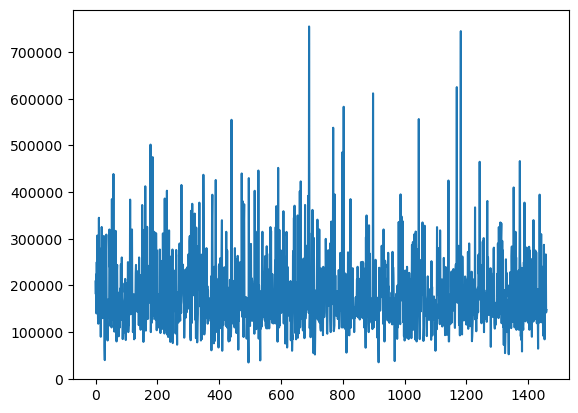

In [11]:
# plot using DataFrame and plot-type is 'line'
df_numerical['SalePrice'].plot()

In [12]:
df_numerical['SalePrice'].sort_values(ascending=True).unique()

array([ 34900,  35311,  37900,  39300,  40000,  52000,  52500,  55000,
        55993,  58500,  60000,  61000,  62383,  64500,  66500,  67000,
        68400,  68500,  72500,  73000,  75000,  75500,  76000,  76500,
        78000,  79000,  79500,  79900,  80000,  80500,  81000,  82000,
        82500,  83000,  83500,  84000,  84500,  84900,  85000,  85400,
        85500,  86000,  87000,  87500,  88000,  89000,  89471,  89500,
        90000,  90350,  91000,  91300,  91500,  92000,  92900,  93000,
        93500,  94000,  94500,  94750,  95000,  96500,  97000,  97500,
        98000,  98300,  98600,  99500,  99900, 100000, 101000, 101800,
       102000, 102776, 103000, 103200, 103600, 104000, 104900, 105000,
       105500, 105900, 106000, 106250, 106500, 107000, 107400, 107500,
       107900, 108000, 108480, 108500, 108959, 109000, 109008, 109500,
       109900, 110000, 110500, 111000, 111250, 112000, 112500, 113000,
       114500, 114504, 115000, 116000, 116050, 116500, 116900, 117000,
      

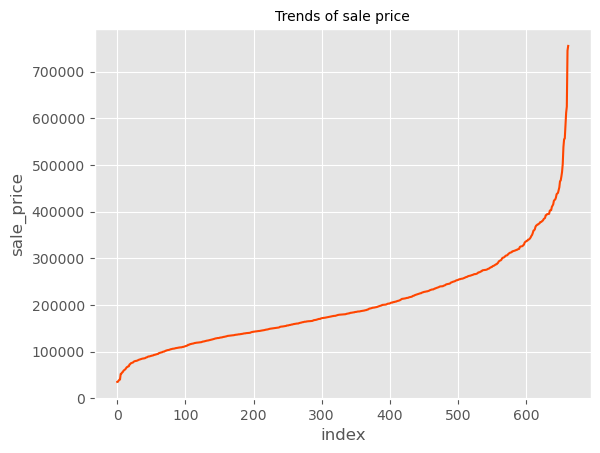

In [13]:
# below code is common for diffent graph types, except for line 2 - ie change is in plt.plot()
plt.style.use("ggplot")
plt.plot(df_numerical['SalePrice'].sort_values(ascending=True).unique(), color='orangered')
plt.xlabel("index")
plt.ylabel("sale_price")
plt.title("Trends of sale price", size=10)
plt.show()

# 2. Bar plot
    * univariate or bivariate plots
    * used with categorical dataset
    * used to display count of unique values for cateogircal type, height of bar representing count

In [14]:
df_categorical

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,SC60,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,No,No,No,Feb,WD,Normal
1,SC20,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,RFn,TA,TA,Y,No,No,No,May,WD,Normal
2,SC60,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,No,No,No,Sep,WD,Normal
3,SC70,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Unf,TA,TA,Y,No,No,No,Feb,WD,Abnorml
4,SC60,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,RFn,TA,TA,Y,No,No,No,Dec,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,SC60,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,RFn,TA,TA,Y,No,No,No,Aug,WD,Normal
1456,SC20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,Unf,TA,TA,Y,No,MnPrv,No,Feb,WD,Normal
1457,SC70,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,RFn,TA,TA,Y,No,GdPrv,Shed,May,WD,Normal
1458,SC20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Unf,TA,TA,Y,No,No,No,Apr,WD,Normal


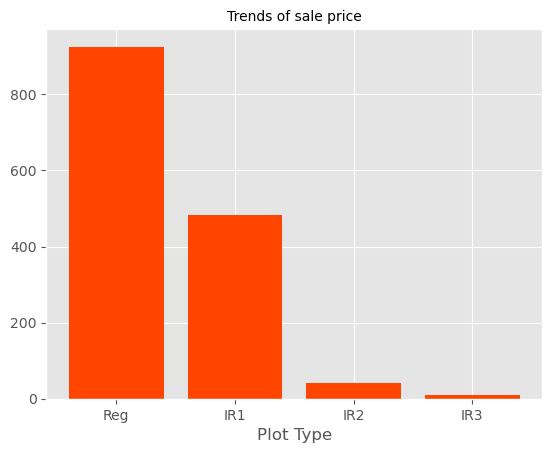

In [15]:
plt.style.use("ggplot")
plt.bar(x=df_categorical['LotShape'].value_counts().index, height=df_categorical['LotShape'].value_counts().values, color='orangered')
plt.xlabel("Plot Type")
plt.title("Trends of sale price", size=10)
plt.show()

# 3. Histogram
    * for univariate analysis
    * applied on continuous data
    * used for analysis of frequencyof data in range
    * used majorly for study of data distribution/spread
    * data put into equally-spaced bins

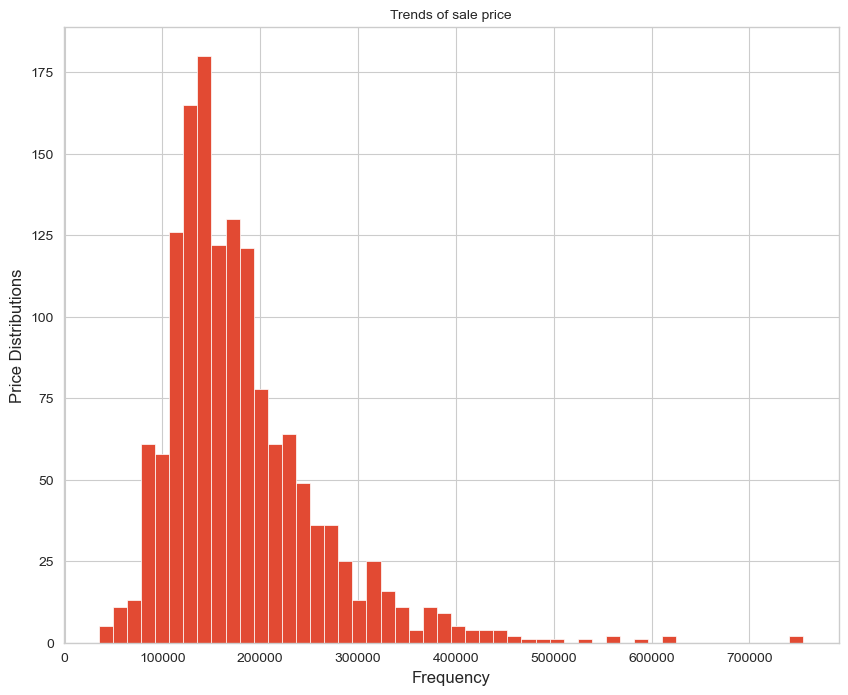

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
plt.hist(df_numerical["SalePrice"], bins=50)
plt.xlabel("Frequency")
plt.ylabel("Price Distributions")
plt.title("Trends of sale price", size=10)
plt.show()

# 4. Subplots
    * One plot is split into multiple plots, each index postion occupied by one plot

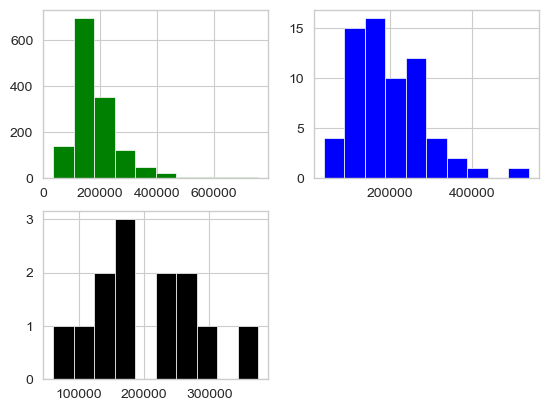

In [17]:
plt.subplot(2, 2, 1)
plt.hist(housing_data.query("LandSlope == 'Gtl'")['SalePrice'], bins=10, color='green')

plt.subplot(2, 2, 2)
plt.hist(housing_data.query("LandSlope == 'Mod'")['SalePrice'], bins=10, color='blue')

plt.subplot(2, 2, 3)
plt.hist(housing_data.query("LandSlope == 'Sev'")['SalePrice'], bins=10, color='black')

plt.show()

# 5. Scatterplot
    * indicates relationship plot or correlation between two numerical columns
    * 3 possibilites of the plot

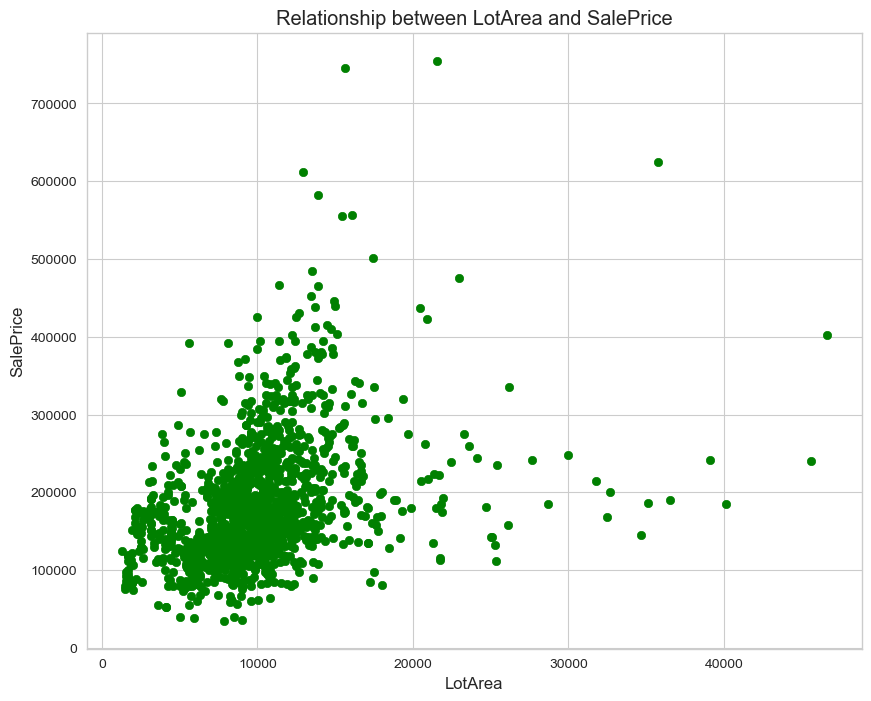

In [18]:
plt.figure(figsize=(10,8))
plt.scatter(df_numerical[df_numerical['LotArea'] < 50000]['LotArea'], df_numerical[df_numerical['LotArea'] < 50000]['SalePrice'], color='green')
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.title("Relationship between LotArea and SalePrice")
plt.show()

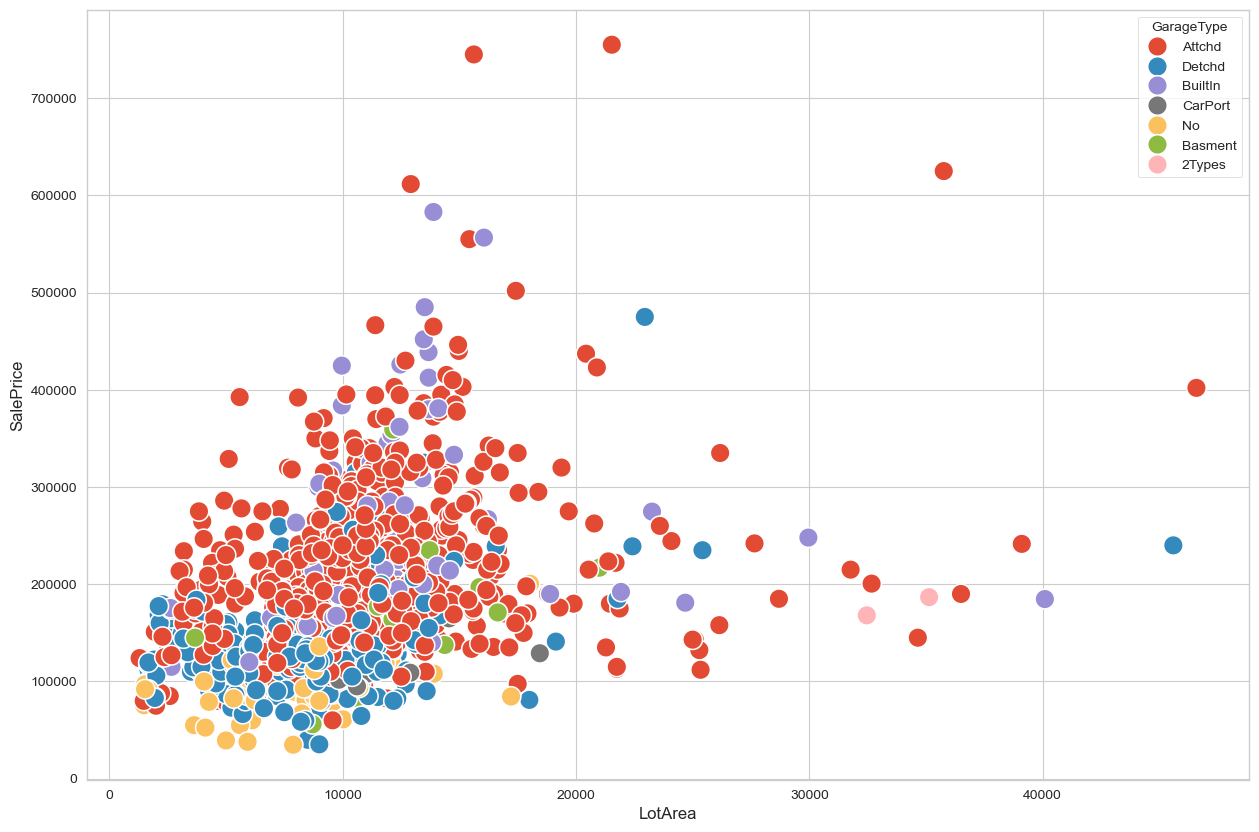

In [19]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df_numerical[df_numerical['LotArea'] < 50000]['LotArea'], 
                y=df_numerical[df_numerical['LotArea'] < 50000]['SalePrice'],
               hue=df_categorical['GarageType'], s=200)
plt.show()

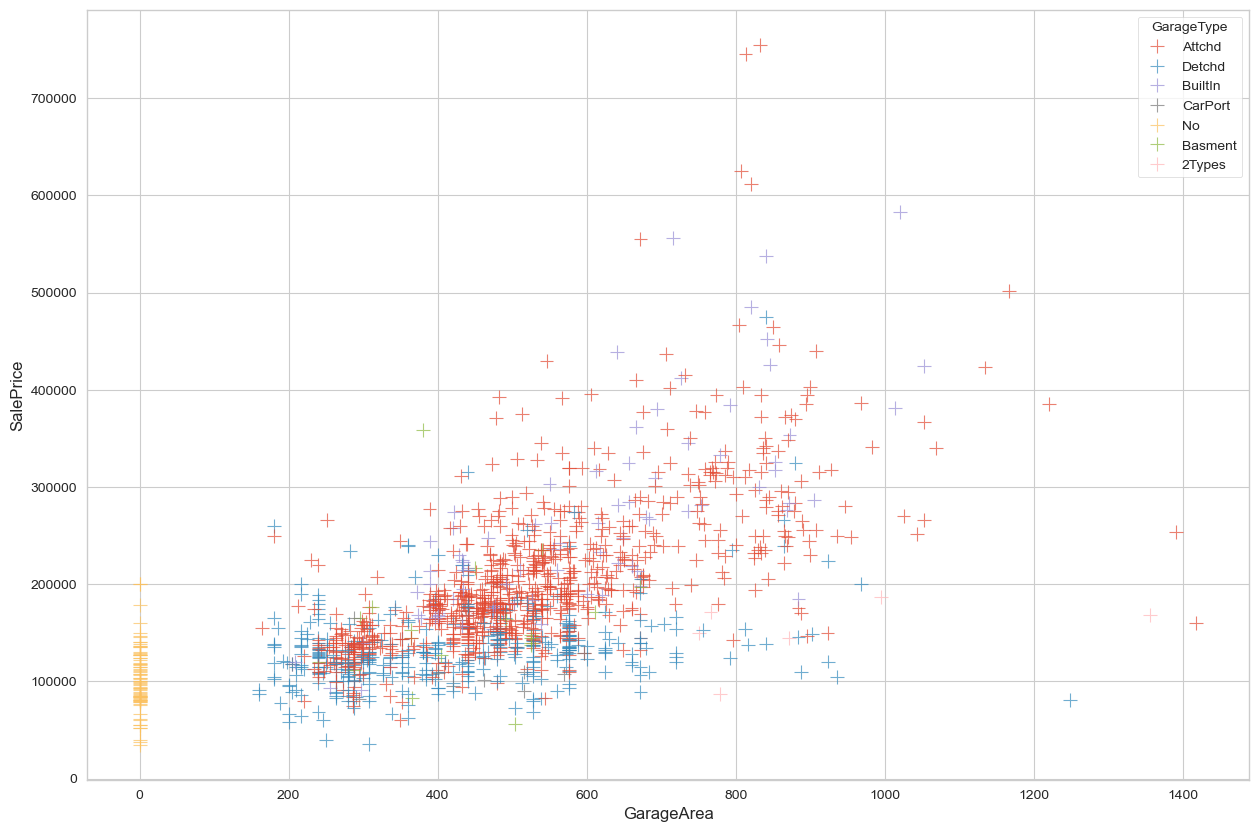

In [20]:
plt.figure(figsize=(15,10))
# s is size of bubble
# marker indicates s[square]|d[diamond]|<|>|^|+|*...
# alpha is transparency
sns.scatterplot(x=df_numerical['GarageArea'], 
                y=df_numerical['SalePrice'],
               hue=df_categorical['GarageType'], s=100, marker='+', alpha=0.7)
plt.show()

# 6. PieChart
    * frequency distribution plot

In [21]:
df_categorical['LotConfig'].value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

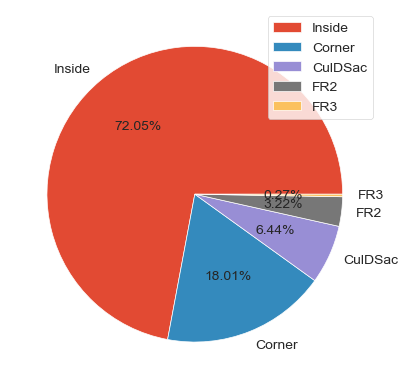

In [22]:
plt.pie(df_categorical['LotConfig'].value_counts(), autopct="%0.02f%%", 
       labels=["Inside", "Corner", "CulDSac", "FR2", "FR3"])
plt.legend(loc=1)      # legend requires labels
plt.show()

# 7. Kernel Density Estimator Plot
    * KDE Plot
    * Shows histogram+density plot to show distribution of numerical continuous data

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12068\348452047.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_numerical[df_numerical['GarageArea']>0]['GarageArea'], color='blue')


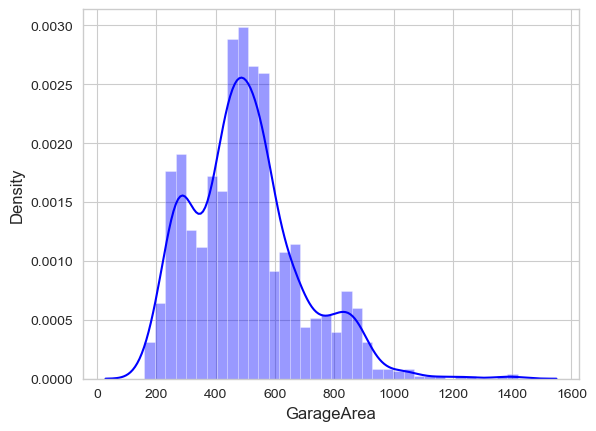

In [23]:
sns.distplot(df_numerical[df_numerical['GarageArea']>0]['GarageArea'], color='blue')
plt.show()

# 8. BoxPlot

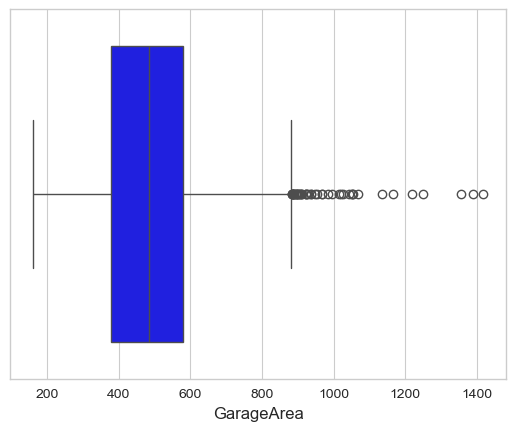

In [33]:
sns.boxplot(df_numerical[df_numerical['GarageArea']>0]['GarageArea'], color='blue', orient="h")
plt.show()

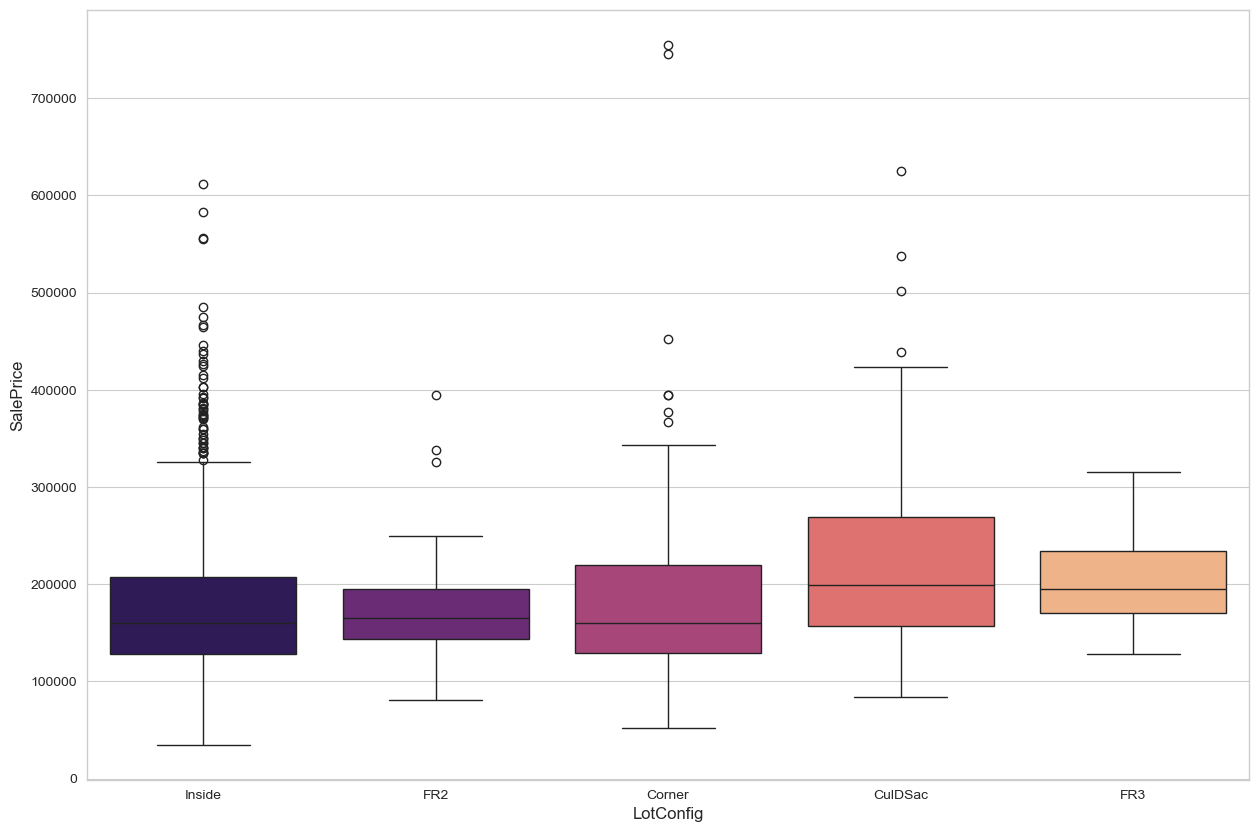

In [43]:
plt.figure(figsize=(15,10))
sns.boxplot(x="LotConfig", y="SalePrice", data=housing_data, hue="LotConfig", palette="magma")
plt.show()

# 9. AreaPlot

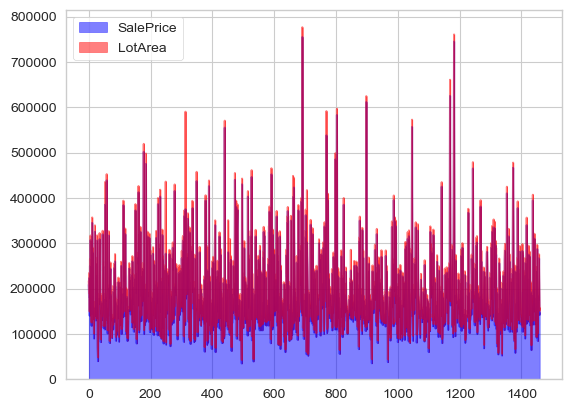

In [97]:
housing_data[["SalePrice", "LotArea"]].plot(kind="area", stacked="True", alpha=0.5, color=["blue", "red"])
plt.show()

# 10. ViolinPlot

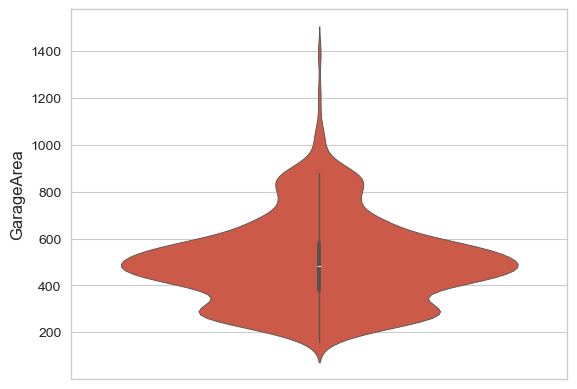

In [27]:
sns.violinplot(df_numerical[df_numerical['GarageArea']>0]['GarageArea'])
plt.show()

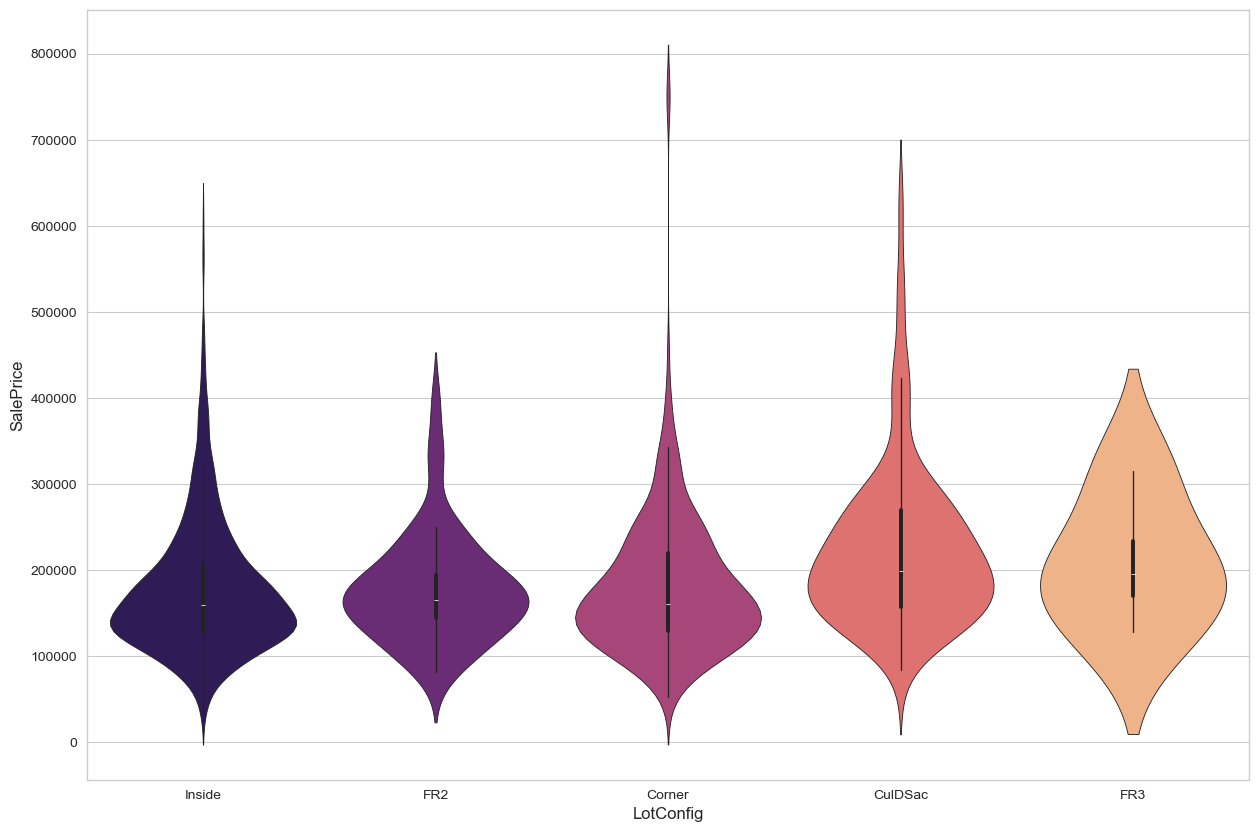

In [45]:
plt.figure(figsize=(15,10))
sns.violinplot(x="LotConfig", y="SalePrice", data=housing_data, hue="LotConfig", palette="magma")
plt.show()

# 11. MultivariatePlot
    * example is heatmap
    * matrix form data
    

In [57]:
df_numerical.corr()[['SalePrice']]

,SalePrice
LotFrontage,0.209624
LotArea,0.263843
OverallQual,0.790982
OverallCond,-0.077856
YearBuilt,0.522897
YearRemodAdd,0.507101
MasVnrArea,0.472614
BsmtFinSF1,0.386420
BsmtFinSF2,-0.011378
BsmtUnfSF,0.214479


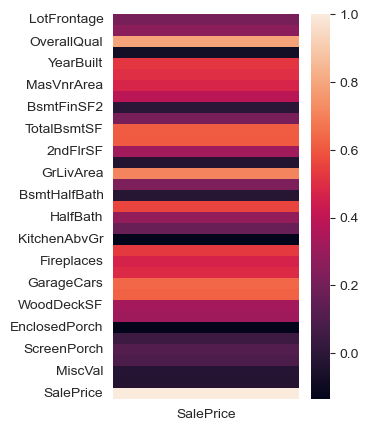

In [65]:
plt.figure(figsize=(3,5))
sns.heatmap(df_numerical.corr()[['SalePrice']])
plt.show()

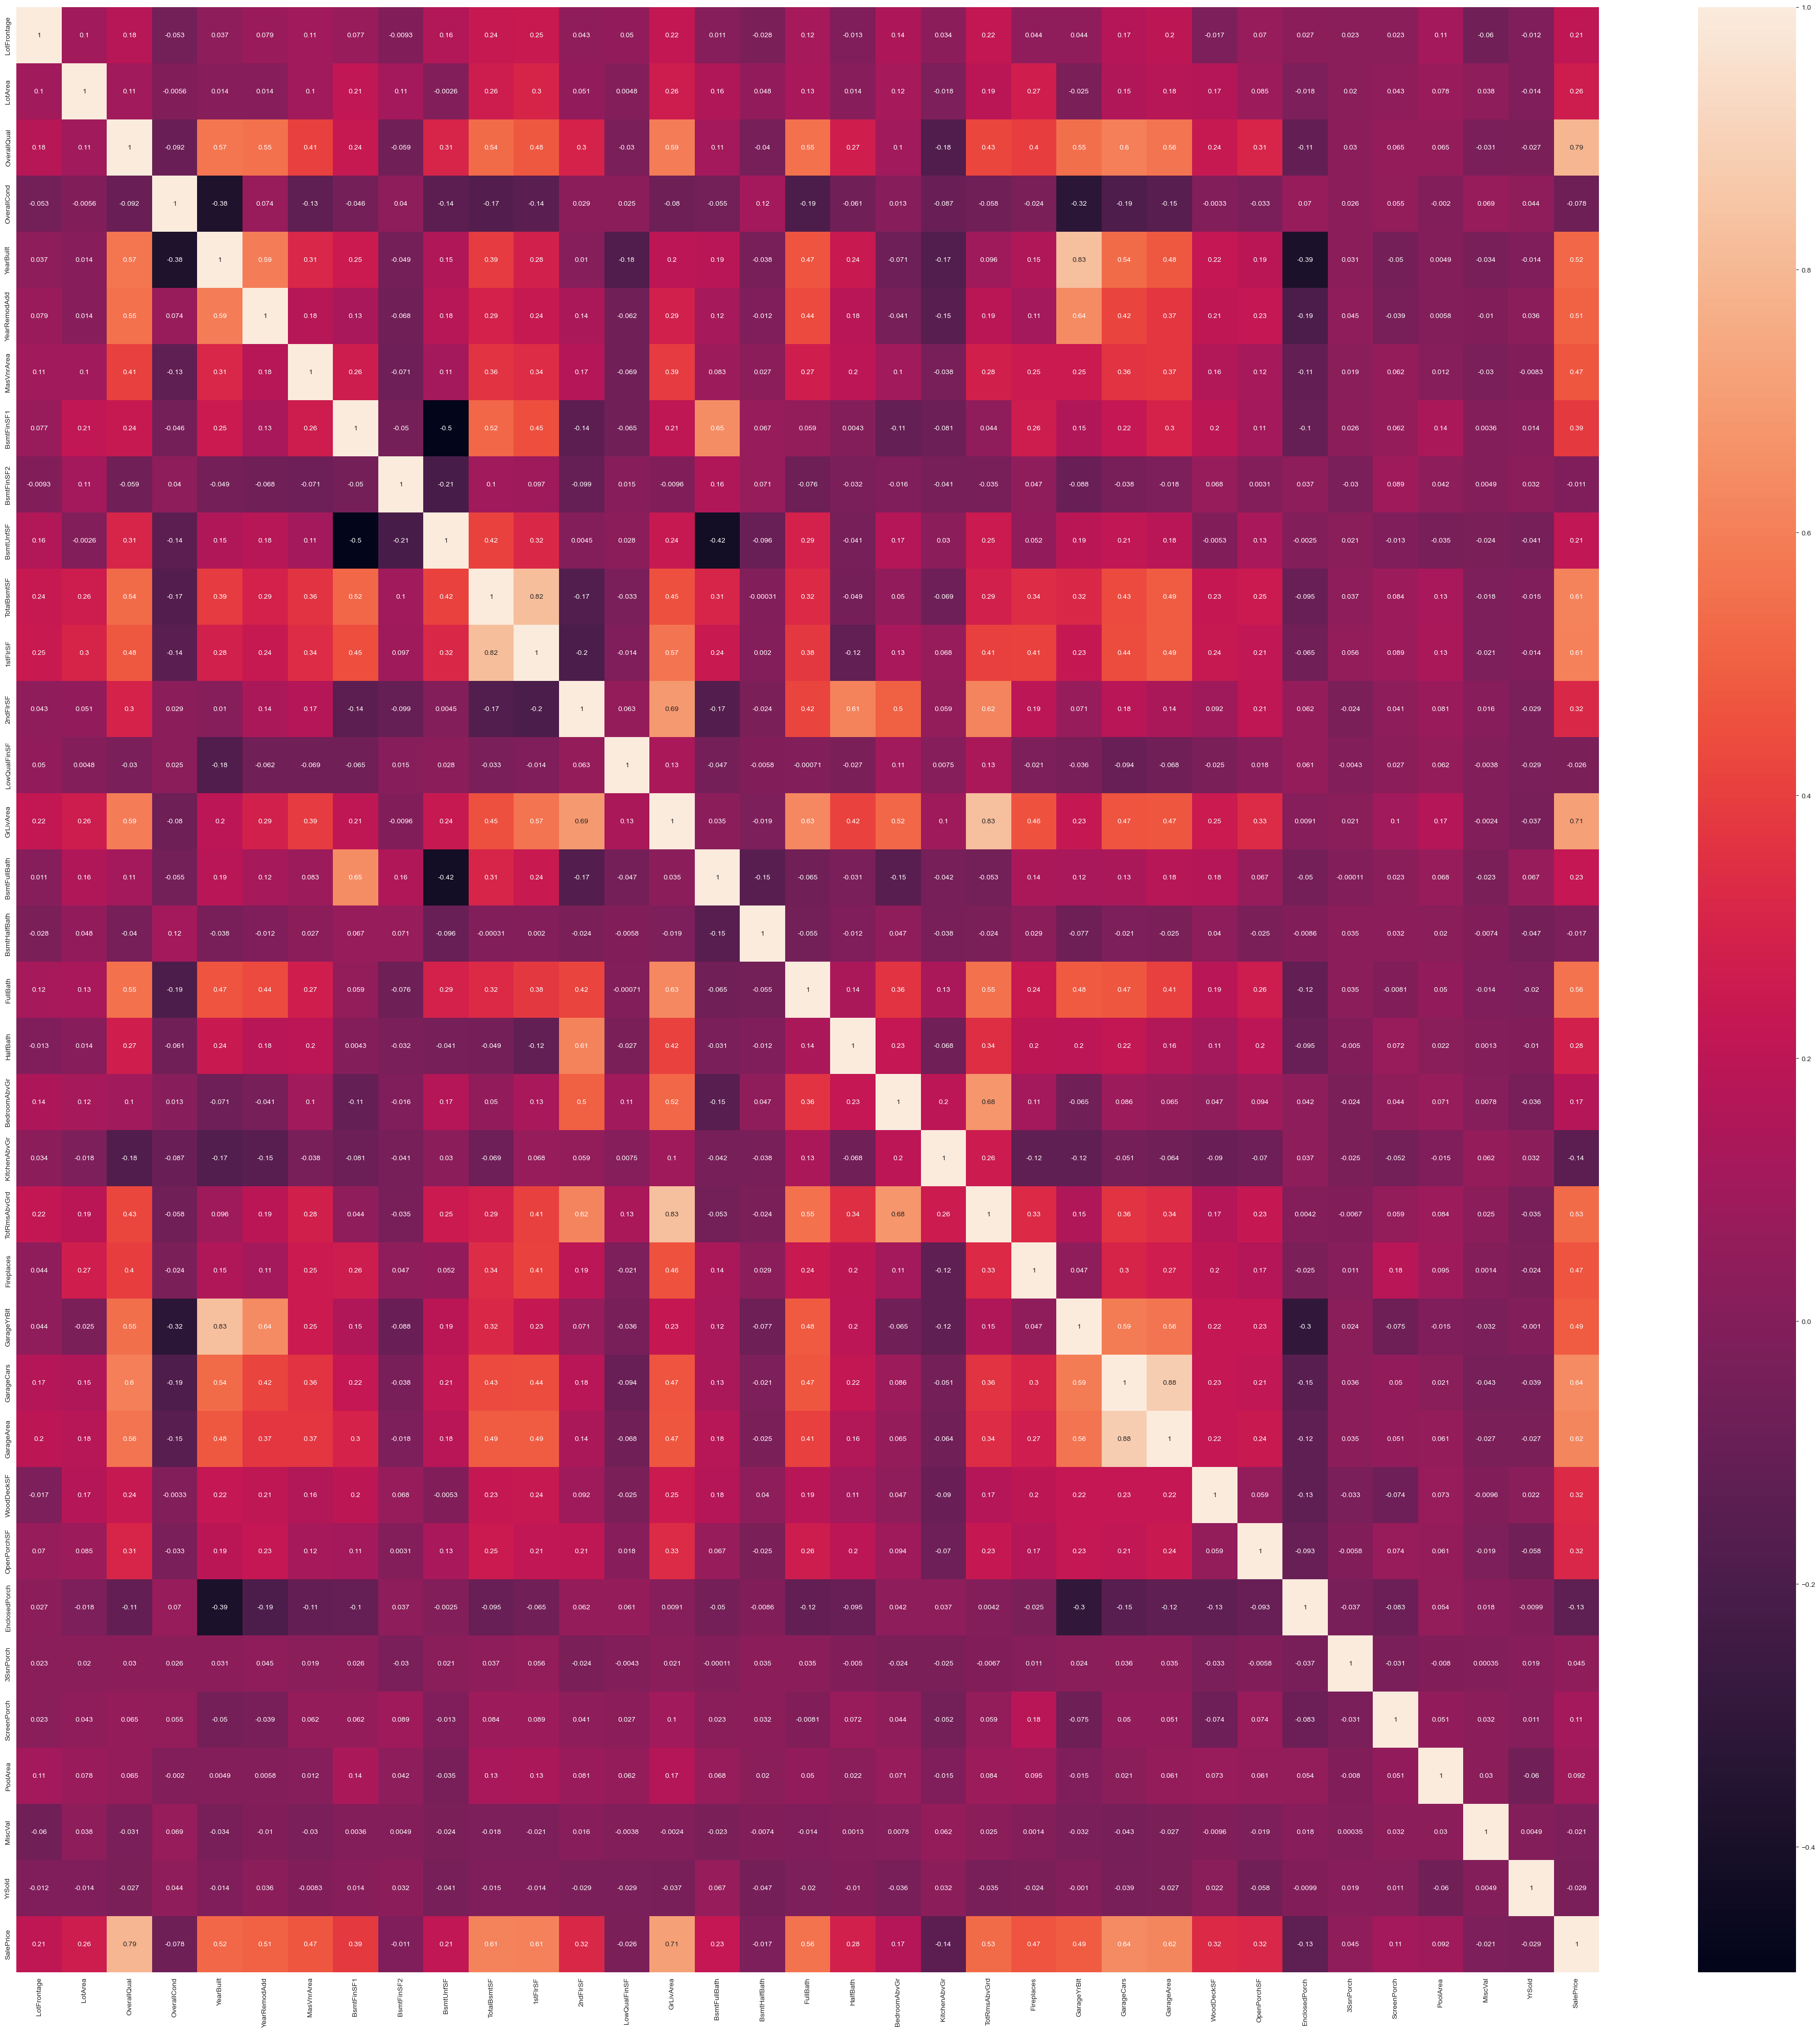

In [68]:
plt.figure(figsize=(50,50))
sns.heatmap(df_numerical.corr(), annot=True)
plt.show()